In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
data = pd.read_csv("gtd_4.1.17-5.14.17.csv")

In [3]:
data.columns

Index(['event_id', 'event_date', 'country', 'region', 'provstate', 'summary',
       'weapdetail', 'source'],
      dtype='object')

1. Comparison of Occurance in Regions

According to the data of Global Terrorism Database between April 1, 2017 and May 14, 2017. We can first discover that regions like Middle East & North African, South Asia, Sub-Saharan African, and South East Asia contains the highest frequencies among all regions in occurances of terrorist attacks. With the country level, we can discover that Iraq, Afghanistan, India, and Somalia have the highest frequencies among other countries.

In [4]:
data.groupby("region").size().sort_values(ascending=False)

region
Middle East & North Africa     406
South Asia                     384
Sub-Saharan Africa             235
Southeast Asia                 156
Western Europe                  26
South America                   20
Eastern Europe                  16
North America                   10
Central America & Caribbean      1
Australasia & Oceania            1
dtype: int64

In [5]:
data.groupby("country").size().sort_values(ascending=False)[:10]

country
Iraq           270
Afghanistan    140
India          109
Somalia         90
Pakistan        85
Thailand        76
Philippines     73
Nigeria         52
Nepal           41
Egypt           30
dtype: int64

If We go deeper to the division of the region in Iraq, Afghanistan and India, we may observe that that the distributions of occurances in Iraq and India are concentrating in specific regions, which may be related to specific characteristics of these regions. In comparison, the the occurances are wide spreaded in Afghanistan, which means that terrorist events may rely on features in the country level that are reletively identical in regions.

In [6]:
data[data["country"] == "Iraq"].groupby("provstate").size().sort_values(ascending=False)[:5]

provstate
Nineveh     108
Diyala       41
Al Anbar     37
Baghdad      34
Saladin      31
dtype: int64

In [7]:
data[data["country"] == "Iraq"].groupby("provstate").size().sort_values(ascending=False).hist()

In [8]:
data[data["country"] == "Afghanistan"].groupby("provstate").size().sort_values(ascending=False)[:5]

provstate
Nangarhar    19
Kabul        19
Kandahar     13
Jawzjan      10
Takhar        7
dtype: int64

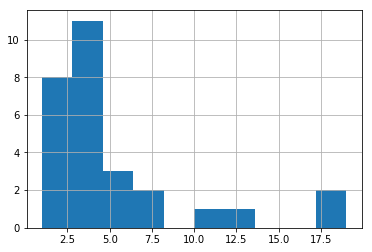

In [9]:
data[data["country"] == "Afghanistan"].groupby("provstate").size().sort_values(ascending=False).hist()

In [10]:
data[data["country"] == "India"].groupby("provstate").size().sort_values(ascending=False)[:5]

provstate
Jammu and Kashmir    47
Chhattisgarh         18
Jharkhand             8
Manipur               6
Bihar                 6
dtype: int64

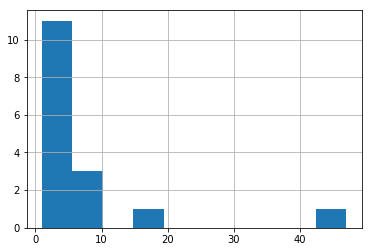

In [11]:
data[data["country"] == "India"].groupby("provstate").size().sort_values(ascending=False).hist()

2. Comparision of the Types

From the summary, we are able to find the indicator for the types of occurances. We can then discover that there are 484 out of 1255 events happening within this one and half months are related to "explosive", which may be categorized as severe and influential events

In [12]:
data["explosive_dummy"] = data.apply(lambda x: 1 if re.findall("(explosive)", x["summary"]) != [] else 0, axis=1)

In [13]:
data.groupby("explosive_dummy").size()

explosive_dummy
0    771
1    484
dtype: int64

If we go deeper into the information in this indicator of explosive, we can observe the distribution of explosive events between countries. We can discover that Iraq and Afghanistan are the countries with highest frequencies of both total occurance and explosive events. However, as we see the third country on the list, Tailand may have improportion higher occurances in explosive events comparing to other countries since it rank 6 in the total occurances.

In [14]:
data[data["explosive_dummy"]==1].groupby(["country", "explosive_dummy"]).size().sort_values(ascending=False)[:10]

country      explosive_dummy
Iraq         1                  164
Afghanistan  1                   49
Thailand     1                   48
Pakistan     1                   38
Somalia      1                   32
Nepal        1                   30
India        1                   25
Philippines  1                   22
Turkey       1                   12
Libya        1                   11
dtype: int64

In [15]:
explosive_count = data[data["explosive_dummy"]==1].groupby(["country", "explosive_dummy"]).size().sort_values(ascending=False)\
                                 .to_frame().reset_index().rename(columns={0:"explosive_count"})
total_count = data.groupby("country").size().to_frame().reset_index().rename(columns={0:"total_count"})
full_count = pd.merge(explosive_count, total_count, left_on="country", right_on="country")

In [16]:
full_count["explosive / total"] = full_count["explosive_count"] / full_count["total_count"]
full_count.sort_values(by='total_count', ascending=False)[:10]

,country,explosive_dummy,explosive_count,total_count,explosive / total
0,Iraq,1,164,270,0.607407
1,Afghanistan,1,49,140,0.350000
6,India,1,25,109,0.229358
4,Somalia,1,32,90,0.355556
3,Pakistan,1,38,85,0.447059
2,Thailand,1,48,76,0.631579
7,Philippines,1,22,73,0.301370
14,Nigeria,1,3,52,0.057692
5,Nepal,1,30,41,0.731707
10,Egypt,1,10,30,0.333333


In [17]:
np.mean(full_count.sort_values(by='total_count', ascending=False)[:10]["explosive / total"])

0.40450613531384433

The table above might be an evidence to state that Tailand in comparison to Iraq and Afghanistan, has higher proportion of explosive events in the total occurances (denoted as ratio). We can also observe that comparing to the mean ratio of the countries which have the 10 highest occurances (0.4045), Iraq, Tailand, Nepal have significant higher ratio and India, Nigeria have lower than average ratio of explosive events. These information is valuable to distinguish the types of torrerist events happening in specific regions. It should be considered as an important clue to track the difference in regional characteristis which are related to this difference in ratio.

In [18]:
data[data["weapdetail"].notnull()].groupby(["country", "explosive_dummy"]).size().sort_values(ascending=False)[:10]

country      explosive_dummy
Iraq         1                  73
             0                  47
Afghanistan  1                  34
Somalia      0                  31
India        0                  25
Pakistan     1                  21
Nepal        1                  20
Thailand     1                  19
Philippines  1                  17
Somalia      1                  16
dtype: int64

In the above table, we can discover the brief summary of weapen type in explosive events within countries

3. Brief Analysis of the sources

Despite the fact that I also care about the source of the data for the events, which is important for checking the creditability of the data. However, using "police" and "press" in the regular expression search is not sufficient to provide valid categories of the source since they might be written in more implicit and indirect ways.

In [19]:
data["police_source_dummy"] = data.apply(lambda x: 1 if re.findall("([Pp]olice)", x["source"]) != [] else 0, axis=1)
data["press_dummy"] = data.apply(lambda x: 1 if re.findall("([Pp]ress)", x["source"]) != [] else 0, axis=1)

In [20]:
data.groupby("police_source_dummy").size()

police_source_dummy
0    1165
1      90
dtype: int64

In [21]:
data.groupby("press_dummy").size()

press_dummy
0    1116
1     139
dtype: int64

In [22]:
data["source"][0]

'"Hosted Product: Libya Press Review Security Terrorism Arabic Sources June 6, 201," Libya Foreign and Domestic Affairs Digest, June 6, 2017.'

Without the time limit, I will like to explore the detail categories of the type of events with more specified and detail search with regular expression methods. Incorporated with data of regional characteristics, the data of the frequency, count, and , ratio may be informative in providing features in machine learning training in the future. Moreover, since the time interval of the data is very short, it is expected to be very sensitive to series of event happening in that period. In order to validate and depict more general patterns of the terrorism events, I will like to analysis the Global Terrorism Database with longer time span.